In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [2]:
# Load the data
gold_data = pd.read_csv('gold_price.csv')
silver_data = pd.read_csv('silver_price.csv')

In [3]:
# Dropping the rows with missing values
gold_data = gold_data.fillna(method='bfill')
silver_data = silver_data.fillna(method='bfill')

In [4]:
# Assign sequential integers to dates
gold_data['date-index'] = range(1, len(gold_data)+1)
silver_data['date-index'] = range(1, len(silver_data)+1)

In [5]:
gold_data

,date,price,date-index
0,1968-01-02,37.70,1
1,1968-01-03,37.70,2
2,1968-01-04,37.70,3
3,1968-01-05,37.70,4
4,1968-01-08,37.70,5
...,...,...,...
13456,2021-03-30,1683.95,13457
13457,2021-03-31,1691.05,13458
13458,2021-04-01,1726.05,13459
13459,2021-04-06,1744.65,13460


In [6]:
silver_data

,date,price,date-index
0,1968-01-02,2.173,1
1,1968-01-03,2.225,2
2,1968-01-04,2.171,3
3,1968-01-05,2.157,4
4,1968-01-08,2.163,5
...,...,...,...
13470,2021-03-30,24.340,13471
13471,2021-03-31,24.000,13472
13472,2021-04-01,24.315,13473
13473,2021-04-06,25.040,13474


In [7]:
# Convert the date column to datetime objects
gold_data['date'] = pd.to_datetime(gold_data['date'])
silver_data['date'] = pd.to_datetime(silver_data['date'])

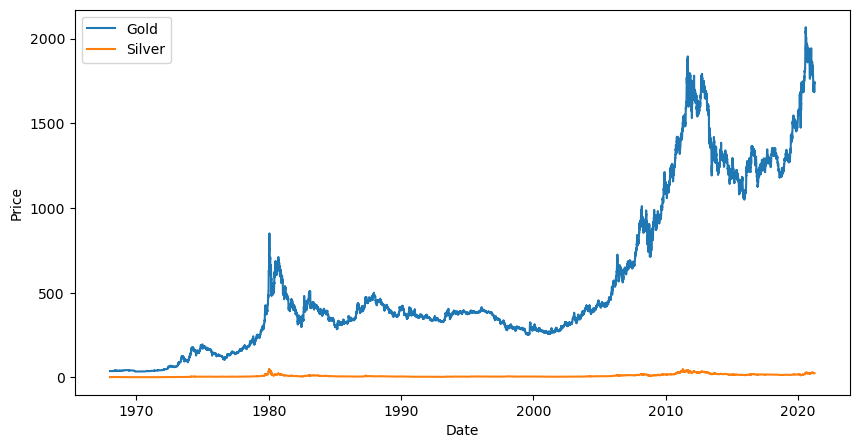

In [8]:
# Plot the data
plt.figure(figsize=(10,5))
plt.plot(gold_data['date'], gold_data['price'], label='Gold')
plt.plot(silver_data['date'], silver_data['price'], label='Silver')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [9]:
X = gold_data[['date-index']]
y = gold_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

gold_model = LinearRegression()
gold_model.fit(X_train.values,y_train)

LinearRegression()

In [10]:
y_pred = gold_model.predict(X_test)
y_pred

C:\Users\KIIT\mambaforge\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([-118.08641714,  403.25966823,  677.32414958, ...,  954.8642715 ,
        189.91667212, 1062.91580331])

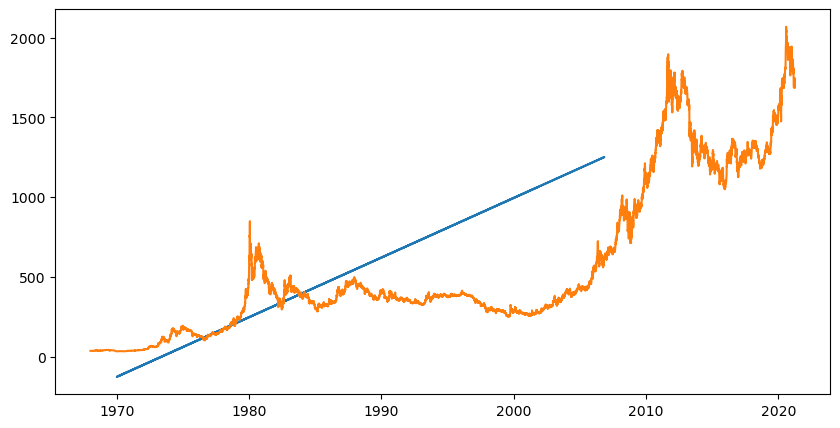

In [11]:
plt.figure(figsize=(10,5))
plt.plot(X_test,y_pred, label="Gold Predicted")
plt.plot(gold_data['date'], gold_data['price'], label='Gold')
plt.show()

In [12]:
X = silver_data[['date-index']]
y = silver_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

silver_model = LinearRegression()
silver_model.fit(X_train.values,y_train)

LinearRegression()

In [13]:
y_pred = silver_model.predict(X_test)
y_pred

C:\Users\KIIT\mambaforge\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([ 0.90416892, 12.16088057,  1.45321364, ..., 11.53155101,
        2.32469264, 17.4622699 ])

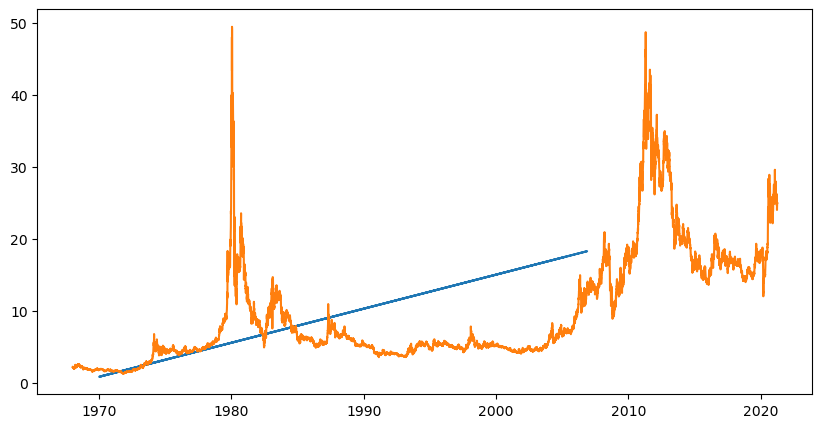

In [14]:
plt.figure(figsize=(10,5))
plt.plot(X_test,y_pred, label="SIlver Predicted")
plt.plot(silver_data['date'], silver_data['price'], label='Silver')
plt.show()

In [15]:
user_date = input('Enter a date:')
user_date_index = pd.to_datetime(user_date)-pd.to_datetime(gold_data.loc[0,'date'])
user_date_index //= np.timedelta64(1, 'D')

price_of_gold = gold_model.predict([[user_date_index]])[0]
price_of_silver = silver_model.predict([[user_date_index]])[0]

print('price of gold on '+str(user_date)+' is $'+str(price_of_gold))
print('price of silver on '+str(user_date)+' is $'+str(price_of_silver))

Enter a date:2023-04-20
price of gold on 2023-04-20 is $1940.003923413814
price of silver on 2023-04-20 is $26.97472863158692
